In [1]:
from __future__ import annotations

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm

import gymnasium as gym


In [ ]:
env = gym.make("CartPole-v1", render_mode = "human")
observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, truncated, terminated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [2]:
env = gym.make("ALE/Bowling-v5", render_mode = "human")
observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, truncated, terminated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()

env.close()

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/Users/helloworld/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


KeyboardInterrupt: 

In [3]:
observation

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[180, 122,  48],
        [180, 122,  48],
        [180, 122,  48],
        ...,
        [180, 122,  48],
        [180, 122,  48],
        [180, 122,  48]],

       [[180, 122,  48],
        [180, 122,  48],
        [180, 122,  48],
        ...,
        [180, 122,  48],
        [180, 122,  48],
        [180, 122,  48]],

       [[180, 122,  48],
        [180, 122,  48],
        [180, 122,  48],
        ...,
        [180, 122,  48],
        [180, 122,  48],
        [180, 122,  48]]

In [4]:
info

{'lives': 0, 'episode_frame_number': 1024, 'frame_number': 1024}

# Observing Env

In [20]:
env = gym.make("ALE/Bowling-v5")

In [21]:
done = False
observation, info = env.reset()



In [22]:
action = env.action_space.sample()

observation, reward, terminated,truncated, info = env.step(action)

/Users/helloworld/anaconda3/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:249: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


# Epsilon-Greedy Strategy


In [24]:
class BowlingAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Updates the Q-value of an action."""
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )

        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [25]:
# hyperparameters
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = BlackjackAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [26]:
from collections import deque
from gym.wrappers import RecordEpisodeStatistics

In [27]:
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
defaultdict(lambda: np.zeros(env.action_space.n))

defaultdict(<function __main__.<lambda>()>, {})

In [28]:
env_blackjack = gym.make("Blackjack-v1")

In [30]:
env_bowling = gym.make("ALE/Bowling-v5")

In [32]:
env_bowling.action_space

Discrete(6)

In [33]:
env_blackjack.action_space

Discrete(2)

In [34]:
env_blackjack.observation_space

Tuple(Discrete(32), Discrete(11), Discrete(2))

In [35]:
env_bowling.observation_space

Box(0, 255, (210, 160, 3), uint8)

# Deep Q-Networks

In [14]:
import numpy as np
import gym
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mean_squared_error

In [15]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.n_actions = action_size
        self.lr = 0.001
        self.gamma = 0.99
        self.exploration_proba = 1.0
        self.exploration_proba_decay = 0.005
        self.batch_size = 32

        self.memory_buffer = list()
        self.max_memory_buffer = 2000

        self.model =  Sequential([
            Dense(24, input_shape = state_size, activation = 'relu'),
            Dense(24, activation = 'relu'),
            Dense(action_size, activation = 'linear')
        ])

        self.model.compile(loss="mse", optimizer = Adam(lr=self.lr))


        

        def compute_action(self, current_state):
            if np.random.uniform(0,1) < self.exploration_proba:
                return np.random.choice(range(self.n_actions))
            q_values = self.model.predict(current_state)
            return np.argmax(q_values)
        
        def update_exploration_probability(self):
            self.exploration_proba = self.exploration_proba * np.exp(-self.exploration_proba_decay) # epsilon-greedy formula

        def store_episode(self, current_state, action, reward, next_state, done):
            self.memory_buffer.append({
                 "current_state": current_state,
                "action":action,
                "reward":reward,
                "next_state":next_state,
                "done" :done
            })

            if len(self.memory_buffer) > self.max_memory_buffer:
                self.memory_buffer.pop()

        def train(self):
            np.random.shuffle(self.memory_buffer)
            batch_sample = self.memory_buffer[0:self.batch_size]

            for experience in batch_sample:
                q_current_state = self.model.predict(experience["current_state"])
                q_target = experience["reward"]

                if not experience["done"]:
                    q_target = self.q_target + self.gamma*np.max(self.model.predict(experience["next_state"])[0])
                
                q_current_state[0][experience["action"]] = q_target

                self.model.fit(experience["current_state"], q_current_state, verbose = 0)

        



In [16]:
env = gym.make('CartPole-v1')

state_size = env.observation_space.shape[0]
action_size = env.action_space.n

n_episodes = 400
max_iteration_ep = 500

agent = DQNAgent(state_size, action_size)
total_steps = 0


for e in range(n_episodes):
    current_state = env.reset()
    current_state = np.array([current_state])

    for step in range(max_iteration_ep):
        total_steps = total_steps+1

        action = agent.compute_action(current_state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.array([next_state])

        agent.store_episode(current_state, action, reward, next_state, done)


        if done:
            agent.update_exploration_probability()
            break
        current_state = next_state

        if total_steps >= batch_size:
            agent.train(batch_size=batch_size)

TypeError: 'int' object is not iterable

# Copy from website

In [20]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.n_actions = action_size
        # we define some parameters and hyperparameters:
        # "lr" : learning rate
        # "gamma": discounted factor
        # "exploration_proba_decay": decay of the exploration probability
        # "batch_size": size of experiences we sample to train the DNN
        self.lr = 0.001
        self.gamma = 0.99
        self.exploration_proba = 1.0
        self.exploration_proba_decay = 0.005
        self.batch_size = 32
        
        # We define our memory buffer where we will store our experiences
        # We stores only the 2000 last time steps
        self.memory_buffer= list()
        self.max_memory_buffer = 2000
        
        # We creaate our model having to hidden layers of 24 units (neurones)
        # The first layer has the same size as a state size
        # The last layer has the size of actions space
        self.model = Sequential([
            Dense(units=24,input_dim=state_size, activation = 'relu'),
            Dense(units=24,activation = 'relu'),
            Dense(units=action_size, activation = 'linear')
        ])
        self.model.compile(loss="mse",
                      optimizer = Adam(lr=self.lr))
        
    # The agent computes the action to perform given a state 
    def compute_action(self, current_state):
        # We sample a variable uniformly over [0,1]
        # if the variable is less than the exploration probability
        #     we choose an action randomly
        # else
        #     we forward the state through the DNN and choose the action 
        #     with the highest Q-value.
        if np.random.uniform(0,1) < self.exploration_proba:
            return np.random.choice(range(self.n_actions))
        q_values = self.model.predict(current_state)[0]
        return np.argmax(q_values)

    # when an episode is finished, we update the exploration probability using 
    # espilon greedy algorithm
    def update_exploration_probability(self):
        self.exploration_proba = self.exploration_proba * np.exp(-self.exploration_proba_decay)
        print(self.exploration_proba)
    
    # At each time step, we store the corresponding experience
    def store_episode(self,current_state, action, reward, next_state, done):
        #We use a dictionnary to store them
        self.memory_buffer.append({
            "current_state":current_state,
            "action":action,
            "reward":reward,
            "next_state":next_state,
            "done" :done
        })
        # If the size of memory buffer exceeds its maximum, we remove the oldest experience
        if len(self.memory_buffer) > self.max_memory_buffer:
            self.memory_buffer.pop(0)
    

    # At the end of each episode, we train our model
    def train(self):
        # We shuffle the memory buffer and select a batch size of experiences
        np.random.shuffle(self.memory_buffer)
        batch_sample = self.memory_buffer[0:self.batch_size]
        
        # We iterate over the selected experiences
        for experience in batch_sample:
            # We compute the Q-values of S_t
            q_current_state = self.model.predict(experience["current_state"])
            # We compute the Q-target using Bellman optimality equation
            q_target = experience["reward"]
            if not experience["done"]:
                q_target = q_target + self.gamma*np.max(self.model.predict(experience["next_state"])[0])
            q_current_state[0][experience["action"]] = q_target
            # train the model
            self.model.fit(experience["current_state"], q_current_state, verbose=0)

In [36]:
# We create our gym environment 
env = gym.make("CartPole-v1")
# We get the shape of a state and the actions space size
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
# Number of episodes to run
n_episodes = 400
# Max iterations per epiode
max_iteration_ep = 500
# We define our agent
agent = DQNAgent(state_size, action_size)
total_steps = 0

# We iterate over episodes
for e in range(n_episodes):
    # We initialize the first state and reshape it to fit 
    #  with the input layer of the DNN
    current_state = env.reset()
    
    for step in range(max_iteration_ep):
        total_steps = total_steps + 1
        # the agent computes the action to perform
        action = agent.compute_action(current_state)
        # the envrionment runs the action and returns
        # the next state, a reward and whether the agent is done
        next_state, reward, truncated, info, done  = env.step(action)
        next_state = np.array([next_state])
        
        # We sotre each experience in the memory buffer
        agent.store_episode(current_state, action, reward, next_state, done)
        
        # if the episode is ended, we leave the loop after
        # updating the exploration probability
        if done:
            agent.update_exploration_probability()
            break
        current_state = next_state
    # if the have at least batch_size experiences in the memory buffer
    # than we tain our model
    if total_steps >= batch_size:
        agent.train(batch_size=batch_size)

/Users/helloworld/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/helloworld/anaconda3/lib/python3.11/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


NameError: name 'batch_size' is not defined

In [18]:
np.array([state_size])

array([4])

In [23]:
current_state = env.reset()
current_state = np.array([current_state])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 2) + inhomogeneous part.

In [24]:
current_state = env.reset()
current_state

(array([ 0.00747159, -0.01249113, -0.04659681,  0.03171724], dtype=float32),
 {})

In [35]:
observation, reward, truncated, info, done = env.step(action)

In [31]:
np.array(current_state)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [37]:

def make_video():
    env_to_wrap = gym.make('CartPole-v1')
    env = wrappers.Monitor(env_to_wrap, 'videos', force = True)
    rewards = 0
    steps = 0
    done = False
    state = env.reset()
    state = np.array([state])
    while not done:
        action = agent.compute_action(state)
        state, reward, done, _ = env.step(action)
        state = np.array([state])            
        steps += 1
        rewards += reward
    print(rewards)
    env.close()
    env_to_wrap.close()
make_video()

NameError: name 'wrappers' is not defined

# Building Another DQN

In [2]:
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [3]:
env = gym.make("CartPole-v1")

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

A lower γ makes rewards from the uncertain far future less important for our agent than the ones in the near future that it can be fairly confident about. It also encourages agents to collect reward closer in time than equivalent rewards that are temporally far away in the future.

In [5]:
class DQN(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [6]:
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

n_actions = env.action_space.n
state, info = env.reset()
n_observations  = len(state)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())


optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)

steps_done = 0

In [8]:
def select_action(state):
    global steps_done 
    sample = random.random()

    eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1 * steps_done/ EPS_DECAY)

    steps_done+=1

    if sample > eps_threshold:
        with torch.no_grad():
            return policy_net(state).max(1).indices.view(1, 1)
        
    else:
        return torch.tensor([[env.action_space.sample()]], device=device, dtype = torch.long)
    
episode_durations = []
        
    

In [14]:
def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

In [10]:

def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    
    transitions = memory.sample(BATCH_SIZE)
    
    batch = Transition(*zip(*transitions))

    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])

    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    state_action_values = policy_net(state_batch).gather(1, action_batch)

    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1).values

    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()

    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()
    



Complete


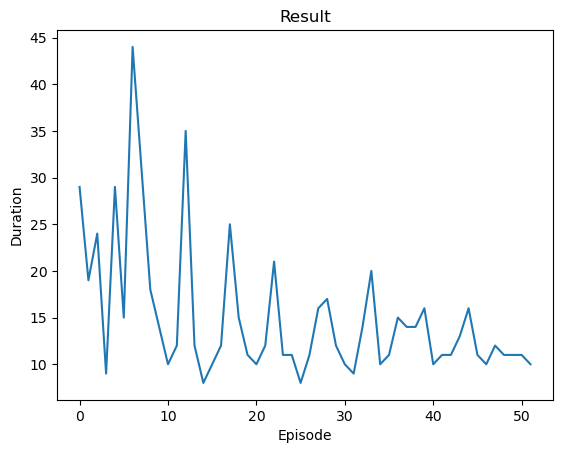

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
if torch.cuda.is_available():
    num_episodes = 600
else:
    num_episodes = 50

for i_episode in range(num_episodes):
    # Initialize the environment and get its state
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    for t in count():
        action = select_action(state)
        observation, reward, terminated, truncated, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

# Analzying DQN

Exploration - improving the current knowledge about each action